# Project: Wrangling and Analyze Data

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import requests as rq
import tweepy
import json
import matplotlib.pyplot as plt
import re
import time
import seaborn as sns
import sys

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# function to read a csv file and save in a pandas dataframe variable
def Upload_csv(dataset):
    data = pd.read_csv(dataset)
    return data

twitter_enhanced= Upload_csv('dataset/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# using requests library to download the tsv file hosted on Udacity's server

def Upload_tsv(url,dataset):
    response = rq.get(url)
    with open(dataset,'wb') as file:
        file.write(response.content)
    data = pd.read_csv(dataset, sep='\t')
    return data

image_predictions=Upload_tsv("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv",'./dataset/image_predictions.tsv')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
CONSUMER_KEY = 'HIDDEN'
CONSUMER_SECRET = 'HIDDEN'
OAUTH_TOKEN = 'HIDDEN'
OAUTH_TOKEN_SECRET = 'HIDDEN'

In [5]:
# using tweepy library

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# list of tweet ids from enhanced data set

tweet_ids = twitter_enhanced['tweet_id']

In [7]:
# creating a list for tweets with exceptions/errors
tweet_error_list = []

# list of tweets
tweets = []

# start time of execution
start = time.time()

# for loop which will add each available tweet json to tweets list
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json

        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})

    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweet_error_list.append(tweet_id)

# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ 404 Not Found
144 - No status found with that ID.
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
144 - No status found with that ID.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
851861385021730816 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
844704788403113984 _ 404 Not Found
144 - No status found with that ID.
842892208864923648 _ 404 Not Found
144 - No status found with that ID.
837366

Rate limit reached. Sleeping for: 123


779123168116150273 _ 404 Not Found
144 - No status found with that ID.
775096608509886464 _ 404 Not Found
144 - No status found with that ID.
771004394259247104 _ 403 Forbidden
179 - Sorry, you are not authorized to see this status.
770743923962707968 _ 404 Not Found
144 - No status found with that ID.
766864461642756096 _ 404 Not Found
144 - No status found with that ID.
759923798737051648 _ 404 Not Found
144 - No status found with that ID.
759566828574212096 _ 404 Not Found
144 - No status found with that ID.
754011816964026368 _ 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 267


680055455951884288 _ 404 Not Found
144 - No status found with that ID.
Total time taken for execution 2210.277044057846


In [8]:
# total tweets without erros received from the api
print("The length of the result ", len(tweets))

# total tweets with erros received from the api
print("The length of the errors ", len(tweet_error_list))

The length of the result  2327
The length of the errors  29


In [9]:
# creating dataframe
tweets_json = pd.DataFrame(tweets, columns=['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

#saving the dataframe to file
tweets_json.to_csv('./dataset/tweet_json.txt', encoding='utf-8', index=False)


In [10]:
# read the saved tweet-json.txt file into a dataframe
api_data = pd.read_csv('./dataset/tweet_json.txt', encoding = 'utf-8')

In [11]:
api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33695,6976,9349821,147257,2017-08-01 16:23:56+00:00
1,892177421306343426,29230,5278,9349821,147257,2017-08-01 00:17:27+00:00
2,891815181378084864,21975,3466,9349777,147253,2017-07-31 00:18:03+00:00
3,891689557279858688,36779,7190,9349777,147253,2017-07-30 15:58:51+00:00
4,891327558926688256,35160,7721,9349821,147257,2017-07-29 16:00:24+00:00


In [12]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   int64 
 1   favorites        2327 non-null   int64 
 2   retweets         2327 non-null   int64 
 3   user_followers   2327 non-null   int64 
 4   user_favourites  2327 non-null   int64 
 5   date_time        2327 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


## Assessing Data


In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## 1. Twitter Archived Enhanced Data

In [13]:
twitter_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
twitter_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_enhanced[twitter_enhanced['rating_numerator']>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [17]:
twitter_enhanced[twitter_enhanced['name'].apply(len)<= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [18]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2. Image Predictions data

In [20]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3.Twitter api data

In [24]:
api_data.head(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33695,6976,9349821,147257,2017-08-01 16:23:56+00:00
1,892177421306343426,29230,5278,9349821,147257,2017-08-01 00:17:27+00:00
2,891815181378084864,21975,3466,9349777,147253,2017-07-31 00:18:03+00:00
3,891689557279858688,36779,7190,9349777,147253,2017-07-30 15:58:51+00:00
4,891327558926688256,35160,7721,9349821,147257,2017-07-29 16:00:24+00:00
5,891087950875897856,17735,2586,9349821,147257,2017-07-29 00:08:17+00:00
6,890971913173991426,10323,1649,9349821,147257,2017-07-28 16:27:12+00:00
7,890729181411237888,56638,15691,9349777,147253,2017-07-28 00:22:40+00:00
8,890609185150312448,24432,3605,9349821,147257,2017-07-27 16:25:51+00:00
9,890240255349198849,27845,6075,9349777,147253,2017-07-26 15:59:51+00:00


In [25]:
api_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2322,666049248165822465,88,36,9349771,147253,2015-11-16 00:24:50+00:00
2323,666044226329800704,245,115,9349819,147256,2015-11-16 00:04:52+00:00
2324,666033412701032449,100,36,9349819,147256,2015-11-15 23:21:54+00:00
2325,666029285002620928,112,39,9349771,147253,2015-11-15 23:05:30+00:00
2326,666020888022790149,2283,420,9349819,147256,2015-11-15 22:32:08+00:00


In [26]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   int64 
 1   favorites        2327 non-null   int64 
 2   retweets         2327 non-null   int64 
 3   user_followers   2327 non-null   int64 
 4   user_favourites  2327 non-null   int64 
 5   date_time        2327 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [27]:
api_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.327000e+03,2327.000000,2327.000000,2.327000e+03,2327.000000
mean,7.417930e+17,7027.223893,2460.417705,9.349795e+06,147254.832832
std,6.820795e+16,10918.411379,4166.819636,2.818602e+01,1.876447
min,6.660209e+17,0.000000,1.000000,9.349751e+06,147253.000000
25%,6.781394e+17,1221.000000,492.500000,9.349768e+06,147253.000000
50%,7.178418e+17,3038.000000,1146.000000,9.349779e+06,147253.000000
75%,7.986547e+17,8565.500000,2846.000000,9.349822e+06,147257.000000
max,8.924206e+17,144263.000000,70393.000000,9.349835e+06,147257.000000


### Quality issues
**twitter_enhanced dataframe**
1. retweeted_status_timestamp, timestamp should be datetime instead of object (string).po

2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.

3. In several columns null objects are non-null (None to NaN).

**image_predictions dataframe**

4. p1, p2 and p3 should be categoral datatype

5. p1_conf, p2_conf and p3_conf columns should be merged

6. p1_dog, p2_dog and p3_dog columns should be merged

**api_data dataframe**

7. user_favourites value is same for all rows, which seems incorrect

8. datetime should be of datatime datatype instead of string

### Tidiness issues
1. image_predictions should only have jpg_url and tweet_id, no other information is required

2. *twitter_enhanced* df should be joined to *image_predictions* and *api_data*

3. Combine and clean different dog stages (eg: pupper,doggo, puppo, floofer) columns into one

### Tabulated format of issues.

|**Issue number**|**Description**|**Issue Type**| 
|---------------|---------------|--------------|
|I1| Combine three different dataframes into one master data set| Tidiness|
|I2| Clean sources columns, which is difficult to as such| Quality| 
|I3| Refine respective predictions and confidence columns| Quality|
|I4| Combine and clean different dog stages (eg: pupper,doggo, puppo, floofer) columns into one| Tidiness|
|I5| Clean text column to get dog gender| Quality|
|I6| Remove unwanted columns (retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id ) and clean up duplicate rows and NaNs| Tidiness|
|I7| Drop columns with one low values or similar kind of values|Quality|
|I8| Fix numerator and denominators| Quality|
|I9| Convert NaNs/Nulls to None | Quality|
|I10| Fix datatypes of various columns| Quality|

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
df_twitter_enhanced_clean = twitter_enhanced.copy()
df_image_predictions_clean = image_predictions.copy()
df_api_data_clean = api_data.copy()

### Issue #1:

#### Define:
I1: Resolve the biggest structural issue that is there should be 1 master table instead of 3 tables. Thus I am merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process.

#### Code

In [29]:
df_twitter_enhanced_clean = pd.merge(left=df_twitter_enhanced_clean,
right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id',
how='inner')

In [30]:
df_twitter_enhanced_clean= df_twitter_enhanced_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [31]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

### Issue #2:

#### Define 
I2: Clean the content of source column, make it more readable.

#### Code

In [32]:
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [33]:
df_twitter_enhanced_clean['source'].value_counts()

Twitter for iPhone    2017
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

### Issue #3:

#### Define 

I3: Refine p1, p2 and p3 columns and confidence associated by combining.

#### Code

In [34]:
# store the true algo with it's level of confidence in a list and if false put NaN as confidence value
prediction= []
confidence = []

def GetPredictionConfidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_twitter_enhanced_clean.apply(GetPredictionConfidence, axis=1)
df_twitter_enhanced_clean['prediction'] = prediction
df_twitter_enhanced_clean['confidence'] = confidence


In [35]:
# remove the irrelevant columns in image prediction file
df_twitter_enhanced_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],1)


C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,prediction,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,33695,6976,9349821,147257,2017-08-01 16:23:56+00:00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,29230,5278,9349821,147257,2017-08-01 00:17:27+00:00,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,21975,3466,9349777,147253,2017-07-31 00:18:03+00:00,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,36779,7190,9349777,147253,2017-07-30 15:58:51+00:00,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,35160,7721,9349821,147257,2017-07-29 16:00:24+00:00,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,None,None,88,36,9349771,147253,2015-11-16 00:24:50+00:00,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
2053,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,None,None,245,115,9349819,147256,2015-11-16 00:04:52+00:00,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
2054,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,None,None,100,36,9349819,147256,2015-11-15 23:21:54+00:00,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
2055,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,None,None,112,39,9349771,147253,2015-11-15 23:05:30+00:00,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


### Test

In [36]:
# verify whether two new columns were added and the irrelevant columns deleted
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

### Issue #4:

#### Define
I4: Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.

#### Code

In [37]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_enhanced_clean.columns.tolist() if x not in melt_columns]


# melt the columns into values
df_twitter_enhanced_clean = pd.melt(df_twitter_enhanced_clean, id_vars=stay_columns, value_vars=melt_columns,
                            var_name='stages', value_name='life_stage')


In [38]:
# delete the stages column
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('stages',axis= 1)

C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Test

In [39]:
# verify whether the columns 'doggo', 'floofer', 'pupper' and 'puppo' have been deleted and the column life_stage has been added
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8228 non-null   int64  
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8228 non-null   object 
 4   source                      8228 non-null   object 
 5   text                        8228 non-null   object 
 6   retweeted_status_id         284 non-null    float64
 7   retweeted_status_user_id    284 non-null    float64
 8   retweeted_status_timestamp  284 non-null    object 
 9   expanded_urls               8228 non-null   object 
 10  rating_numerator            8228 non-null   int64  
 11  rating_denominator          8228 non-null   int64  
 12  name                        8228 non-null   object 
 13  favorites                   8228 

In [40]:
# check all types of life_stage values
df_twitter_enhanced_clean.life_stage.value_counts()

None       7897
pupper      221
doggo        78
puppo        24
floofer       8
Name: life_stage, dtype: int64

### Issue #5:

#### Define
I5: Get the correct dog gender from text column by filtering common phrases and assigning a gender. Use 'NaN' if no gender can be retrieved from text.

#### Code

In [41]:
# loop on all the texts, check if it has one of the pronouns of male or female; add that to list.

male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_twitter_enhanced_clean['text']:
    # Male
    if any(map(lambda v: v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v: v in female_pronouns, text.split())):
        gender.append('female')
    # if group or not specified
    else:
        gender.append('NaN')

# add a new column for dog gender
df_twitter_enhanced_clean['dog_gender'] = gender

#### Test

In [42]:
# check the values in new column dog_gender
df_twitter_enhanced_clean.dog_gender.value_counts()

NaN       4680
male      2596
female     952
Name: dog_gender, dtype: int64

### Issue #6:

### Define
I6: Clean data by dropping duplicates row and not meaningful columns. 


In [43]:
# delete the retweets
df_twitter_enhanced_clean = df_twitter_enhanced_clean[pd.isnull(df_twitter_enhanced_clean.retweeted_status_id)]

# delete columns no needed again
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_id', axis=1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_user_id', axis= 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_timestamp', axis = 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('date_time',axis= 1) #imported from the API but has same values as timestamp column

# delete duplicated tweet_id
df_twitter_enhanced_clean= df_twitter_enhanced_clean.drop_duplicates()

# delete tweets with no pictures
df_twitter_enhanced_clean = df_twitter_enhanced_clean.dropna(subset=['jpg_url'])

# delete dog_stage duplicates
df_twitter_enhanced_clean = df_twitter_enhanced_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep='last')


C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3

#### Test

In [44]:
# check the total records after cleaning
print("Number of records ", len(df_twitter_enhanced_clean))

# check the columns
df_twitter_enhanced_clean.info()
df_twitter_enhanced_clean.sample(10)

Number of records  1986
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 7045
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   source                 1986 non-null   object 
 5   text                   1986 non-null   object 
 6   expanded_urls          1986 non-null   object 
 7   rating_numerator       1986 non-null   int64  
 8   rating_denominator     1986 non-null   int64  
 9   name                   1986 non-null   object 
 10  favorites              1986 non-null   int64  
 11  retweets               1986 non-null   int64  
 12  user_followers         1986 non-null   int64  
 13  user_favourites        1986 non-null   int64  
 14  jpg_url                1986 non-

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence,life_stage,dog_gender
1661,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10,10,a,...,corn,0.019421,False,pug,0.019044,True,pug,0.019044,None,NaN
1517,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,Twitter for iPhone,10/10 I'd follow this dog into battle no quest...,https://twitter.com/dog_rates/status/676957860...,10,10,None,...,beagle,0.055902,True,golden_retriever,0.031152,True,Labrador_retriever,0.772423,None,NaN
920,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,Twitter for iPhone,This is Puff. He started out on the streets (f...,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,...,toy_poodle,0.027271,True,miniature_poodle,0.004874,True,Maltese_dog,0.952070,None,male
187,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,Twitter for iPhone,Unbelievable... We. Only. Rate. Dogs. Please s...,https://twitter.com/dog_rates/status/847116187...,11,10,None,...,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False,American_Staffordshire_terrier,0.113434,None,NaN
1248,692158366030913536,NaN,NaN,2016-01-27 01:33:08 +0000,Twitter for iPhone,This is Edgar. He's a Sassafras Puggleflash. N...,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,...,swing,0.018907,False,toy_poodle,0.013544,True,pug,0.956565,None,NaN
875,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,Twitter for iPhone,"""Don't talk to me or my son ever again"" ...10/...",https://twitter.com/dog_rates/status/738402415...,10,10,None,...,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True,cocker_spaniel,0.346695,None,NaN
825,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,Twitter for iPhone,This is Arlen and Thumpelina. They are best pa...,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,...,collie,0.335997,True,borzoi,0.177179,True,Shetland_sheepdog,0.433320,None,NaN
1694,672834301050937345,NaN,NaN,2015-12-04 17:46:12 +0000,Twitter for iPhone,"This is Ed. He's not mad, just disappointed. 1...",https://twitter.com/dog_rates/status/672834301...,10,10,Ed,...,Cardigan,0.258869,True,nipple,0.033835,False,Pembroke,0.582560,None,NaN
712,759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,Twitter for iPhone,This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,...,golden_retriever,0.076899,True,white_wolf,0.063269,False,kuvasz,0.511341,None,NaN
231,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,...,academic_gown,0.020815,False,schipperke,0.011564,True,schipperke,0.011564,doggo,female


In [45]:
df_twitter_enhanced_clean.life_stage.value_counts()

None       1681
pupper      212
doggo        62
puppo        23
floofer       8
Name: life_stage, dtype: int64

### Issue #7:

### Define 
I7: Drop columns with one low values or similar kind of values.
   - One value in in_reply_to_user_id so we will delete the columns of reply all of them replying to @dog_rates.
   - user_favourites has 2 values and they are close.

#### Code

In [46]:
#let's concentrate on low values
print('in_reply_to_user_id')
print(df_twitter_enhanced_clean.in_reply_to_user_id.value_counts())
print('user_favourites')
print(df_twitter_enhanced_clean.user_favourites.value_counts())

in_reply_to_user_id
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
user_favourites
147253    1008
147257     641
147256     337
Name: user_favourites, dtype: int64


In [47]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'],axis=1)

#### Test

In [48]:
# check if the columns above have been deleted
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 7045
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   int64  
 6   rating_denominator  1986 non-null   int64  
 7   name                1986 non-null   object 
 8   favorites           1986 non-null   int64  
 9   retweets            1986 non-null   int64  
 10  user_followers      1986 non-null   int64  
 11  jpg_url             1986 non-null   object 
 12  img_num             1986 non-null   int64  
 13  p1                  1986 non-null   object 
 14  p1_conf             1986 non-null   float64
 15  p1_dog              1986 non-null   bool   
 16  p2    

### Issue #8:

### Define
I8: Fix rating numerator and denominators that are not actually ratings. Also clean the numerators with decimals. 

#### Code

In [49]:
# View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


1390    This is Darrel. He just robbed a 7/11 and is i...
1611    Two gorgeous dogs here. Little waddling dog is...
1511    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1545    These two pups just met and have instantly bon...
1214    This may be the greatest video I've ever been ...
1124    This is Socks. That water pup w the super legs...
1254    When bae says they can't go out but you see th...
1280    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1269    This is Eriq. His friend just reminded him of ...
1965    This is Kial. Kial is either wearing a cape, w...
1974    Two dogs in this one. Both are rare Jujitsu Py...
1881    Here we have Pancho and Peaches. Pancho is a C...
1918    This is Spark. He's nervous. Other dog hasn't ...
2007    These are Peruvian Feldspars. Their names are ...
2036    This is an Albanian 3 1/2 legged  Episcopalian...
1716    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1818    Meet Hank and Sully. Hank is very proud of the...
1769    Meet H

In [50]:
for entry in text_ratings_to_fix:
    mask = df_twitter_enhanced_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_twitter_enhanced_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_twitter_enhanced_clean.loc[mask, column_name2] = 10


In [51]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence,life_stage,dog_gender
1390,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,33686,14837,...,Chihuahua,0.155207,True,loupe,0.153598,False,Chihuahua,0.155207,None,male
1611,674646392044941312,2015-12-09 17:46:48 +0000,Twitter for iPhone,Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,1280,429,...,groenendael,0.086166,True,Labrador_retriever,0.016052,True,flat-coated_retriever,0.837448,None,NaN
1511,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,1496,470,...,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True,Blenheim_spaniel,0.924127,None,NaN
1545,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,2051,915,...,Italian_greyhound,0.173114,True,muzzle,0.071485,False,Chihuahua,0.376741,None,NaN
1214,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,1473,528,...,sunglasses,0.077552,False,ice_lolly,0.051774,False,NaN,0.000000,None,NaN
1124,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,1762,344,...,collie,0.097364,True,English_springer,0.003037,True,Border_collie,0.894842,None,NaN
1254,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,2194,500,...,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,bloodhound,0.886232,None,NaN
1280,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,2019,688,...,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True,collie,0.600186,None,NaN
1269,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,1741,406,...,papillon,0.317368,True,Shetland_sheepdog,0.077616,True,Pembroke,0.426459,None,male
1965,667544320556335104,2015-11-20 03:25:43 +0000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,4,10,Kial,761,457,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,Pomeranian,0.412893,None,NaN


In [52]:
# view tweets with decimls in rating in text column
df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence,life_stage,dog_gender
1436,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1571,438,...,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,kuvasz,0.438627,None,NaN
547,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,17322,5710,...,Persian_cat,0.122978,False,chow,0.102654,True,Pomeranian,0.467321,None,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,40046,8231,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,golden_retriever,0.943082,None,female
4716,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,6176,1489,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,clumber,0.946718,pupper,NaN


In [53]:
# Set correct numerators for specific tweets
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 883482846933004288) & (df_twitter_enhanced_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 786709082849828864) & (df_twitter_enhanced_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 778027034220126208) & (df_twitter_enhanced_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 680494726643068929) & (df_twitter_enhanced_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [54]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


C:\Users\G1 COMPUTERS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence,life_stage,dog_gender
1436,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,1571,438,...,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,kuvasz,0.438627,None,NaN
547,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,17322,5710,...,Persian_cat,0.122978,False,chow,0.102654,True,Pomeranian,0.467321,None,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,40046,8231,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,golden_retriever,0.943082,None,female
4716,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,6176,1489,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,clumber,0.946718,pupper,NaN


### Issue #9:

### Define
I9: Convert 'NaN' values to 'None' type

#### Code

In [55]:
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['prediction'] == 'NaN', 'prediction'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0


#### Test

In [56]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 7045
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   object 
 6   rating_denominator  1986 non-null   int64  
 7   name                1986 non-null   object 
 8   favorites           1986 non-null   int64  
 9   retweets            1986 non-null   int64  
 10  user_followers      1986 non-null   int64  
 11  jpg_url             1986 non-null   object 
 12  img_num             1986 non-null   int64  
 13  p1                  1986 non-null   object 
 14  p1_conf             1986 non-null   float64
 15  p1_dog              1986 non-null   bool   
 16  p2    

### Issue #10:

### Define
I10: correct all datatypes by changing the datatypes of the columns.

#### Code

In [57]:
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(str)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['favorites'] = df_twitter_enhanced_clean['favorites'].astype(int)
df_twitter_enhanced_clean['retweets'] = df_twitter_enhanced_clean['retweets'].astype(int)
df_twitter_enhanced_clean['user_followers'] = df_twitter_enhanced_clean['user_followers'].astype(int)
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['rating_numerator'] = df_twitter_enhanced_clean['rating_numerator'].astype(float)
df_twitter_enhanced_clean['rating_denominator'] = df_twitter_enhanced_clean['rating_denominator'].astype(float)
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')


#### Test

In [58]:
df_twitter_enhanced_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
favorites                           int32
retweets                            int32
user_followers                      int32
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
prediction                         object
confidence                        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
# sace clean dataframe to csv file
df_twitter_enhanced_clean.drop(df_twitter_enhanced_clean.columns[df_twitter_enhanced_clean.columns.str.contains('Unnamed', case= False)], axis=1)
df_twitter_enhanced_clean.to_csv('./dataset/twitter_archive_master.csv', encoding = 'utf-8', index=False)


In [60]:
df_twitter_enhanced_clean = pd.read_csv('./dataset/twitter_archive_master.csv')
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   float64
 6   rating_denominator  1986 non-null   float64
 7   name                1986 non-null   object 
 8   favorites           1986 non-null   int64  
 9   retweets            1986 non-null   int64  
 10  user_followers      1986 non-null   int64  
 11  jpg_url             1986 non-null   object 
 12  img_num             1986 non-null   int64  
 13  p1                  1986 non-null   object 
 14  p1_conf             1986 non-null   float64
 15  p1_dog              1986 non-null   bool   
 16  p2    

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
df_twitter_enhanced_clean
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(object)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')

df_twitter_enhanced_clean.set_index('timestamp', inplace=True)
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1986 entries, 2017-08-01 16:23:56+00:00 to 2016-06-03 01:07:16+00:00
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1986 non-null   object  
 1   source              1986 non-null   category
 2   text                1986 non-null   object  
 3   expanded_urls       1986 non-null   object  
 4   rating_numerator    1986 non-null   float64 
 5   rating_denominator  1986 non-null   float64 
 6   name                1986 non-null   object  
 7   favorites           1986 non-null   int64   
 8   retweets            1986 non-null   int64   
 9   user_followers      1986 non-null   int64   
 10  jpg_url             1986 non-null   object  
 11  img_num             1986 non-null   int64   
 12  p1                  1986 non-null   object  
 13  p1_conf             1986 non-null   float64 
 14  p1_dog              1986 non-null   bool

### Insights:
1. Correlation Heat Map

2. Data partition on basis of life stage of dogs

3. Scatter plot between favorites and retweets

### Visualization 1 : Correlation Heat Map

Text(0.5, 1.0, 'Correlation Heat Map')

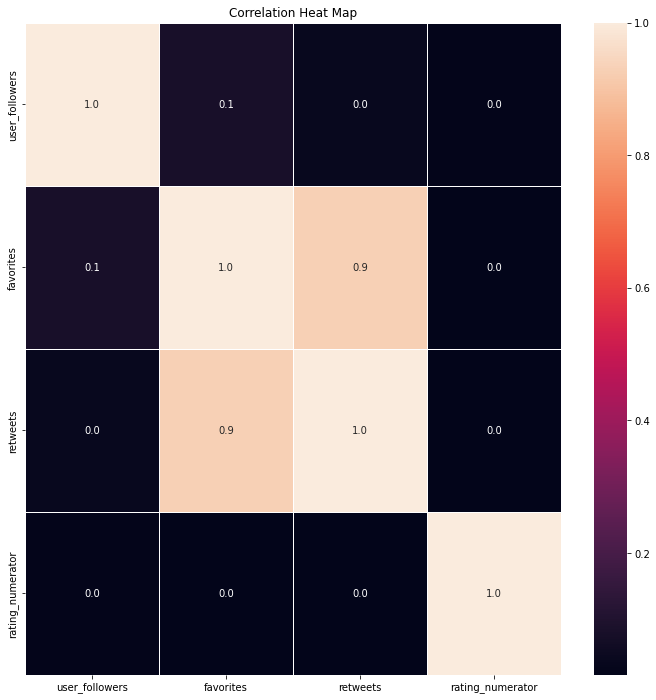

In [62]:
# put up a correlation map
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_twitter_enhanced_clean[['source','user_followers','favorites','retweets',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt='.1f', ax=ax)
plt.title('Correlation Heat Map')

### Analyses 1
- Strong correlation between favorites and retweets, this is expected.
- Negative correlation between user followers and retweets, this is not expected.

### Visualization 2: Data partition on basis of Life stage of dogs

(-1.2880425899576236,
 1.2294910472489025,
 -1.242045058494045,
 1.2111704804959476)

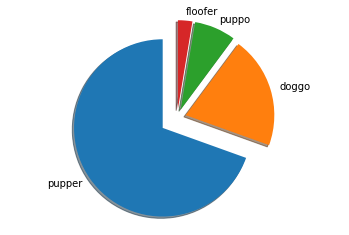

In [63]:
life_stage_count = list(df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Analyses 2
- Dogs in __Pupper__ stage of dog life cycle get most tweets, which is expected.

### Visualization 3: Scatter plot between favorites and retweets. 

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

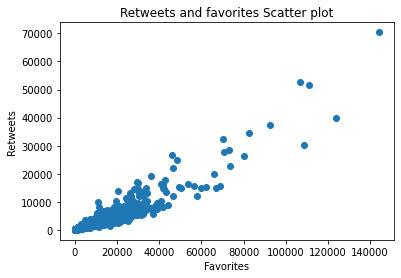

In [64]:
plt.scatter(df_twitter_enhanced_clean['favorites'], df_twitter_enhanced_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### Analyses 3
- As expected there is a big positive (+0.9; shown by correlation heat map) correlation between the retweets and favorites.
